In [2]:
#read whole GTF file as a table by using "pd.read_csv" or "pd.read_table" function
import pandas as pd
GTF=pd.read_csv('Fly_BDGP6.91.gtf',sep='\t',header=None)
GTF.columns=["chr","source","feature","begin","end","score","strand","frame","attribute"]
GTF.head()

,chr,source,feature,begin,end,score,strand,frame,attribute
0,3R,FlyBase,gene,567076,2532932,.,+,.,"gene_id ""FBgn0267431""; gene_name ""Myo81F""; gen..."
1,3R,FlyBase,transcript,567076,2532932,.,+,.,"gene_id ""FBgn0267431""; transcript_id ""FBtr0392..."
2,3R,FlyBase,exon,567076,567268,.,+,.,"gene_id ""FBgn0267431""; transcript_id ""FBtr0392..."
3,3R,FlyBase,exon,835376,835491,.,+,.,"gene_id ""FBgn0267431""; transcript_id ""FBtr0392..."
4,3R,FlyBase,CDS,835378,835491,.,+,0,"gene_id ""FBgn0267431""; transcript_id ""FBtr0392..."


In [3]:
#check how many features
GTF['feature'].unique().tolist()

['gene',
 'transcript',
 'exon',
 'CDS',
 'start_codon',
 'five_prime_utr',
 'three_prime_utr',
 'Selenocysteine']

In [4]:
#check how many chromosomes
GTF['chr'].unique().tolist()

['3R',
 '3L',
 '2R',
 'X',
 '2L',
 'Y',
 '4',
 'mitochondrion_genome',
 'Unmapped_Scaffold_8',
 'rDNA',
 '211000022280328',
 '211000022278279',
 '211000022279681',
 '211000022280494',
 '211000022280703',
 '211000022280481',
 '211000022279188',
 '211000022278436',
 '211000022278449',
 '211000022280347',
 '211000022280341',
 '211000022279392',
 '211000022278760',
 '211000022279165',
 '211000022279264']

In [5]:
# read GTF file, extract information of gene_id, gene_name, gene_type, chr,  begin, end, gene_length

import csv
with open("Fly_BDGP6.91.gtf") as fp:     
    for line in fp:
        cols = line.strip().split("\t") # strip will get rid of \n at the end of each line)
        # only process lines with feature as "gene" in the third column 
        if cols[2]=="gene":
            # parse attribution column
            s = next(csv.reader([cols[8]], delimiter='"')) 
            # calculate gene length
            gene_length = abs(int(cols[4])-int(cols[3]))+1
            with open("result_BGDR_GTF.csv",'a') as f:  # 'a' will append each line. Don't rerun. 
                w = csv.writer(f)
                #write gene_id, gene_name, gene_type, chr,  begin, end, gene_length
                w.writerow([s[1], s[3], s[7],cols[0], cols[3], cols[4],gene_length])
fp.close       
f.close()

In [6]:
#read output csv file as a table by using "pd.read_csv" or "pd.read_table" function
GTF=pd.read_csv('result_BGDR_GTF.csv',sep=',',header=None)
GTF.head()

,0,1,2,3,4,5,6
0,FBgn0267431,Myo81F,protein_coding,3R,567076,2532932,1965857
1,FBgn0085804,CR41571,pseudogene,3R,722370,722621,252
2,FBgn0039987,CR12798,pseudogene,3R,1031171,1031354,184
3,FBgn0267798,CR46123,ncRNA,3R,1366234,1366601,368
4,FBgn0267797,CR46122,ncRNA,3R,1865108,1866008,901


In [7]:
# reset column names
GTF.columns=["gene_id","gene_name","gene_type","chromosome","begin","end","gene_length"]
GTF.head()

,gene_id,gene_name,gene_type,chromosome,begin,end,gene_length
0,FBgn0267431,Myo81F,protein_coding,3R,567076,2532932,1965857
1,FBgn0085804,CR41571,pseudogene,3R,722370,722621,252
2,FBgn0039987,CR12798,pseudogene,3R,1031171,1031354,184
3,FBgn0267798,CR46123,ncRNA,3R,1366234,1366601,368
4,FBgn0267797,CR46122,ncRNA,3R,1865108,1866008,901


In [8]:
GTF.shape

(17737, 7)

In [9]:
# count how many genes in each chromosome
GTF.groupby('chromosome').size()

chromosome
211000022278279            1
211000022278436            1
211000022278449            1
211000022278760            1
211000022279165            1
211000022279188            1
211000022279264            1
211000022279392            1
211000022279681            1
211000022280328            1
211000022280341            1
211000022280347            1
211000022280481            1
211000022280494            2
211000022280703            1
2L                      3496
2R                      3621
3L                      3457
3R                      4191
4                        111
Unmapped_Scaffold_8        2
X                       2671
Y                        113
mitochondrion_genome      38
rDNA                      21
dtype: int64

In [10]:
# change those unknown chromosomes to "unlocalized"
GTF.loc[~GTF['chromosome'].isin (['2L','2R','3L','3R','4','X','Y','rDNA','mitochondrion_genome']),"chromosome"]="unlocalized"
GTF.loc[GTF['chromosome']=="mitochondrion_genome","chromosome"]="Mito"
GTF.groupby('chromosome').size()


chromosome
2L             3496
2R             3621
3L             3457
3R             4191
4               111
Mito             38
X              2671
Y               113
rDNA             21
unlocalized      18
dtype: int64

In [11]:
# change "protein_coding" to "mRNA" in "gene_type" column
GTF.loc[GTF['gene_type']=="protein_coding","gene_type"]="mRNA"
GTF.groupby('gene_type').size()

gene_type
mRNA          13931
ncRNA          2491
pre_miRNA       259
pseudogene      309
rRNA            115
snRNA            32
snoRNA          288
tRNA            312
dtype: int64

In [12]:
# make a dataframe for chromosome and gene number
Df_Chr=pd.DataFrame(GTF.groupby('chromosome').size())
Df_Chr

,0
chromosome,
2L,3496
2R,3621
3L,3457
3R,4191
4,111
Mito,38
X,2671
Y,113
rDNA,21


In [13]:
#convert the row names to a column
Df_Chr.index.name = 'chromosome'
Df_Chr.reset_index(inplace=True)
#Df_Chr.shape
Df_Chr.columns=['chr','gene number']
Df_Chr

,chr,gene number
0,2L,3496
1,2R,3621
2,3L,3457
3,3R,4191
4,4,111
5,Mito,38
6,X,2671
7,Y,113
8,rDNA,21
9,unlocalized,18


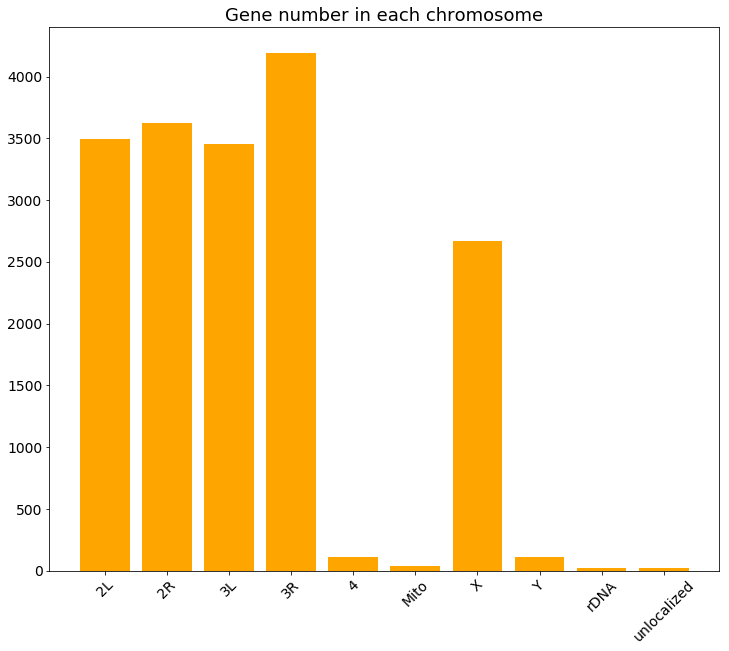

In [14]:
# plot gene numbers in each cromosome

import matplotlib.pyplot as plt
import pylab as plt

plt.figure(figsize=(12,10))
plt.bar(Df_Chr['chr'],Df_Chr['gene number'],color='orange')
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Chromosome',fontsize=14) # add x axis label if you want to
plt.title('Gene number in each chromosome',fontsize=18)
plt.show()
#plt.savefig('Chr_gene_number_plot.png',dpi=100)


In [15]:
# make a dataframe for gene type and gene number
Df_Type=pd.DataFrame(GTF.groupby('gene_type').size())
Df_Type.index.name = 'Type'
Df_Type.reset_index(inplace=True)
Df_Type.columns=['gene_type','number']
Df_Type

,gene_type,number
0,mRNA,13931
1,ncRNA,2491
2,pre_miRNA,259
3,pseudogene,309
4,rRNA,115
5,snRNA,32
6,snoRNA,288
7,tRNA,312


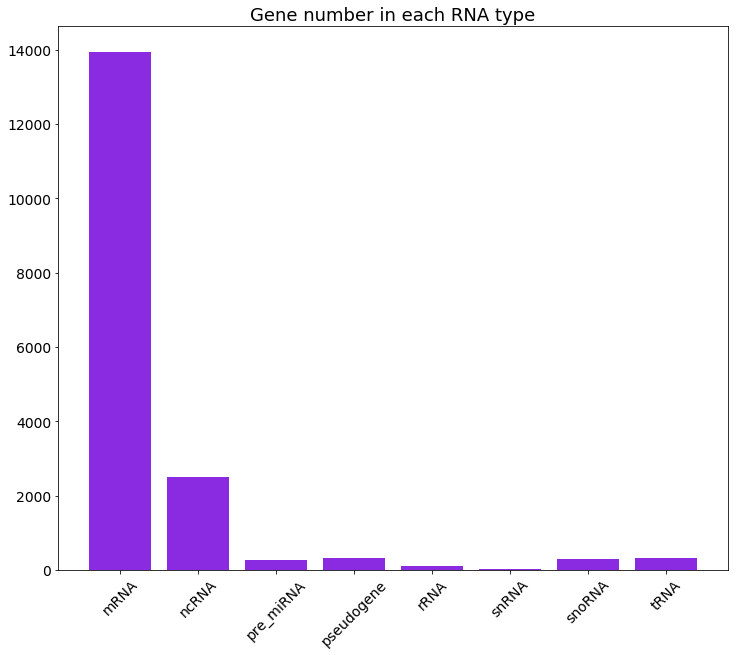

In [16]:
# plot gene numbers in each cromosome

import matplotlib.pyplot as plt
import pylab as plt

plt.figure(figsize=(12,10))
plt.bar(Df_Type['gene_type'],Df_Type['number'],color='blueviolet')
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gene number in each RNA type',fontsize=18)
plt.show()
#plt.savefig('RNA_Type_number_plot.png',dpi=100)

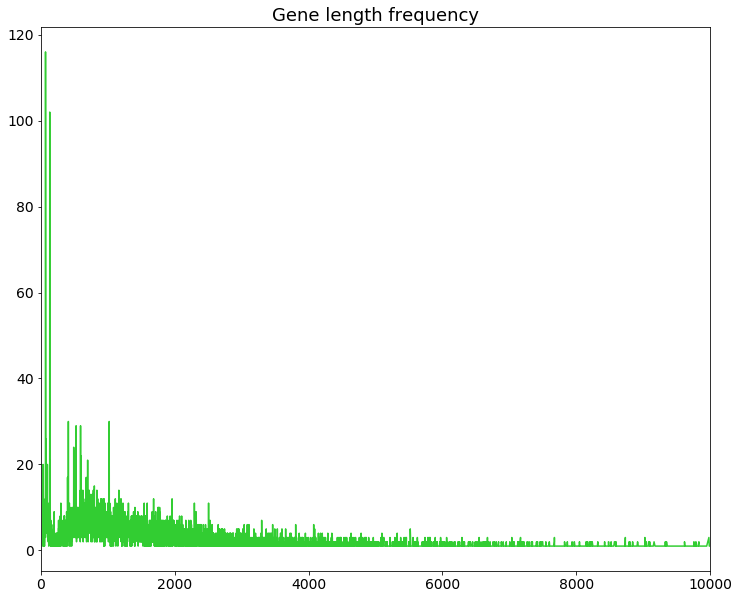

In [17]:
# plot gene length frequency 
import matplotlib.pyplot as plt
import pylab as plt

freq=pd.DataFrame(GTF.groupby('gene_length').size())
freq.index.name = 'gene_length'
freq.reset_index(inplace=True)
freq.columns=['gene_length','freq']

plt.figure(figsize=(12,10))
plt.title('Gene number in each RNA type',fontsize=18)
plt.plot(freq['gene_length'],freq['freq'],color='limegreen')
plt.xlim(0, 10000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gene length frequency',fontsize=18)
plt.show()
#plt.savefig('Gene_length_freq_plot.png',dpi=100)